<a href="https://colab.research.google.com/github/MarcelodeFreitas/udemy_deep_learning_pytorch_python/blob/main/Projeto_2_Classifica%C3%A7%C3%A3o_bin%C3%A1ria_breast_cancer_com_valida%C3%A7%C3%A3o_cruzada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto 2: Classificação binária brest cancer com validação cruzada e dropout

## Etapa 1: Importação das bibliotecas

In [1]:
#library for cross validation
!pip install skorch


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import torch.nn as nn
import skorch
from skorch import NeuralNetBinaryClassifier
import torch
import seaborn as sns
import sklearn
from sklearn.model_selection import cross_val_score

c:\Users\pc\Documents\GitHub\udemy_deep_learning_pytorch_python\udemy_deep_learning_pytorch_python\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
torch.__version__, skorch.__version__, sklearn.__version__

('1.13.1+cpu', '0.13.0', '1.0.2')

## Etapa 2: Base de dados

In [4]:
np.random.seed(123)
torch.manual_seed(123)

In [5]:
previsores = pd.read_csv('./databases/entradas_breast.csv')
classe = pd.read_csv('./databases/saidas_breast.csv')

In [6]:
type(classe)
classe.head()

,0
0,0
1,0
2,0
3,0
4,0


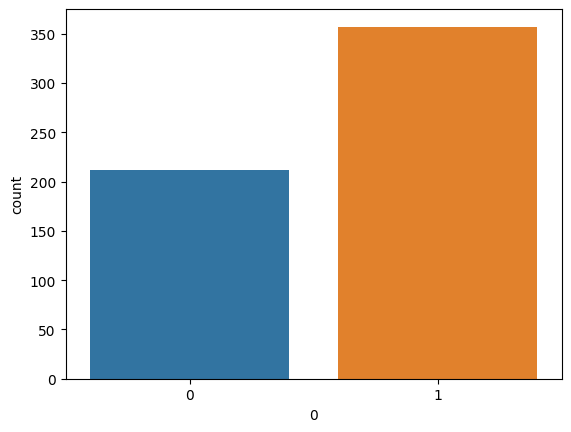

In [7]:
sns.countplot(classe, x="0");

In [8]:
classe.shape

(569, 1)

In [9]:
previsores = np.array(previsores, dtype='float32')
classe = np.array(classe, dtype='float32').squeeze(1)

In [10]:
classe.shape

(569,)

In [11]:
type(previsores)

numpy.ndarray

In [12]:
type(classe)

numpy.ndarray

## Etapa 3: Classe para estrutura da rede neural

** ATUALIZAÇÃO DEZ/2021 **: na versão atual do Skorch, os resultados da rede neural devem ser retornados sem ativação, ou seja, sem a camada sigmoide no final. Com isto, a função de custo deve ser `BCEWithLogitsLoss`.

In [13]:
class classificador_torch(nn.Module):
  def __init__(self):
    super().__init__()

    # 30 -> 16 -> 16 -> 1
    self.dense0 = nn.Linear(30, 16)
    torch.nn.init.uniform_(self.dense0.weight)
    self.activation0 = nn.ReLU()
    self.dense1 = nn.Linear(16, 16)
    torch.nn.init.uniform_(self.dense1.weight)
    self.activation1 = nn.ReLU()
    self.dense2 = nn.Linear(16, 1)
    torch.nn.init.uniform_(self.dense2.weight)
    # self.output = nn.Sigmoid() ** ATUALIZAÇÃO (ver detalhes no texto acima) **

  def forward(self, X):
    X = self.dense0(X)
    X = self.activation0(X)
    X = self.dense1(X)
    X = self.activation1(X)
    X = self.dense2(X)
    # X = self.output(X) ** ATUALIZAÇÃO (ver detalhes no texto acima) **
    return X

## Etapa 4: Skorch

In [14]:
classificador_sklearn = NeuralNetBinaryClassifier(module=classificador_torch,
                                                  criterion=torch.nn.BCEWithLogitsLoss, # ** ATUALIZAÇÃO **
                                                  optimizer=torch.optim.Adam,
                                                  lr=0.001,
                                                  optimizer__weight_decay=0.0001,
                                                  max_epochs=100,
                                                  batch_size=10,
                                                  train_split=False)

## Etapa 5: Validação cruzada

In [15]:
resultados = cross_val_score(classificador_sklearn, previsores, classe, cv = 10, scoring = 'accuracy')

  epoch    train_loss     dur
-------  ------------  ------
      1   107325.7559  0.1806
      2    86254.6321  0.0617
      3    68469.2026  0.0609
      4    53957.7560  0.0751
      5    42087.0207  0.0890
      6    32326.2662  0.0603
      7    24257.5123  0.0600
      8    17518.0696  0.0634
      9    11790.4194  0.0622
     10     6781.5142  0.0627
     11     2218.8346  0.0581
     12      192.7419  0.0632
     13      166.0497  0.0607
     14      142.9422  0.0682
     15      125.7499  0.0587
     16      106.8142  0.0592
     17       91.1919  0.0609
     18       85.3544  0.0588
     19       73.8755  0.0613
     20       69.0474  0.0617
     21       65.7385  0.0617
     22       50.5473  0.0687
     23       49.8245  0.0633
     24       50.5745  0.0657
     25       48.6737  0.0643
     26       47.7067  0.0632
     27       46.9819  0.0619
     28       44.7168  0.0572
     29       41.1926  0.0613
     30       43.1407  0.0578
     31       41.2580  0.0577
     32   

In [16]:
resultados.shape

(10,)

In [17]:
resultados

array([0.77192982, 0.84210526, 0.8245614 , 0.89473684, 0.89473684,
       0.84210526, 0.84210526, 0.87719298, 0.84210526, 0.78571429])

In [18]:
media = resultados.mean()
media

0.8417293233082705

In [19]:
desvio = resultados.std()
desvio

0.03896437151228919

## Etapa 6: Dropout

In [20]:
class classificador_torch(nn.Module):
  def __init__(self):
    super().__init__()

    # 30 -> 16 -> 16 -> 1
    self.dense0 = nn.Linear(30, 16)
    torch.nn.init.uniform_(self.dense0.weight)
    self.activation0 = nn.ReLU()
    self.dropout0 = nn.Dropout(0.2)
    self.dense1 = nn.Linear(16, 16)
    torch.nn.init.uniform_(self.dense1.weight)
    self.activation1 = nn.ReLU()
    self.dropout1 = nn.Dropout(0.2)
    self.dense2 = nn.Linear(16, 1)
    torch.nn.init.uniform_(self.dense2.weight)
    # self.output = nn.Sigmoid() ** ATUALIZAÇÃO **

  def forward(self, X):
    X = self.dense0(X)
    X = self.activation0(X)
    X = self.dropout0(X)
    X = self.dense1(X)
    X = self.activation1(X)
    X = self.dropout1(X)
    X = self.dense2(X)
    # X = self.output(X) ** ATUALIZAÇÃO **
    return X

In [21]:
classificador_sklearn = NeuralNetBinaryClassifier(module=classificador_torch,
                                                  criterion=torch.nn.BCEWithLogitsLoss, # ** ATUALIZAÇÃO **
                                                  optimizer=torch.optim.Adam,
                                                  lr=0.001,
                                                  optimizer__weight_decay=0.0001,
                                                  max_epochs=100,
                                                  batch_size=10,
                                                  train_split=False)

In [22]:
resultados = cross_val_score(classificador_sklearn, previsores, classe, cv = 10, scoring = 'accuracy')

  epoch    train_loss     dur
-------  ------------  ------
      1    77204.7382  0.0948


      2    62859.9799  0.0728
      3    47919.8060  0.0808
      4    37253.3332  0.0643
      5    28715.8834  0.0666
      6    21171.4011  0.0652
      7    15479.6151  0.0645
      8    11178.1636  0.0642
      9     7157.8377  0.0609
     10     4400.4354  0.0657
     11     3267.5334  0.0642
     12     2724.3737  0.0612
     13     2292.4556  0.0638
     14     1761.7725  0.0602
     15     2249.7623  0.0631
     16     1847.9348  0.0606
     17     1830.3051  0.0623
     18     1371.0915  0.0657
     19     1679.6405  0.0627
     20     1549.9060  0.0647
     21     1266.9976  0.0642
     22     1099.8613  0.0634
     23     1306.1372  0.0624
     24     1119.9309  0.0682
     25     1101.9621  0.0667
     26      965.6648  0.0627
     27      908.3313  0.0662
     28      855.3504  0.0672
     29      941.8990  0.0662
     30      723.6768  0.0614
     31      698.6121  0.0642
     32      629.1327  0.0658
     33      591.7343  0.0635
     34      564.9382  0.0637
     35   

In [23]:
media = resultados.mean()
desvio = resultados.std()
media, desvio

(0.6326754385964912, 0.13714558818149605)

In [24]:
resultados

array([0.56140351, 0.78947368, 0.63157895, 0.66666667, 0.50877193,
       0.45614035, 0.89473684, 0.73684211, 0.45614035, 0.625     ])